# Handwriting recognition  <br>

The standard example for machine learning these days is the MNIST data set, a collection of 70,000 handwriting samples of the numbers 0-9.<br>

# Problem statement<br>

To predict which number each handwritten image represents.


# Importing key libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("mnist/dataset.py", one_hot=True)

Extracting mnist/dataset.py\train-images-idx3-ubyte.gz
Extracting mnist/dataset.py\train-labels-idx1-ubyte.gz
Extracting mnist/dataset.py\t10k-images-idx3-ubyte.gz
Extracting mnist/dataset.py\t10k-labels-idx1-ubyte.gz


## Visualize input data

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


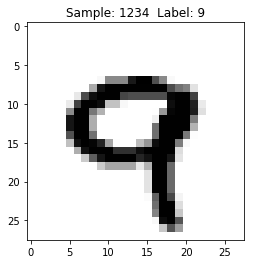

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(mnist.train.labels[num])  
    #Print the label converted back to a number
    label = mnist.train.labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


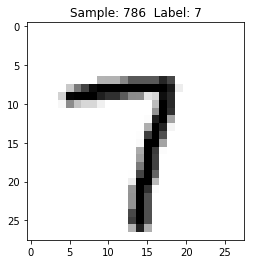

In [5]:
display_sample(786)

 ## Visualize how the data is being fed

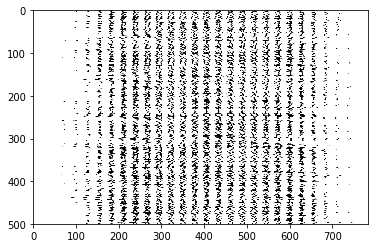

In [6]:
import numpy as np

images = mnist.train.images[0].reshape([1,784])
for i in range(1, 500):
    images = np.concatenate((images, mnist.train.images[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

## Placeholders

In [7]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

While training, we'll assign input_images to the training images and target_labels to the training lables.<br> While testing, we'll use the test images and test labels instead.

## Setting typology 
Reserve variables to keep track of the all the weights and biases for both layers

In [8]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

##  setting up the neural network

In [9]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases #Output layer

In [11]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [13]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) % 100 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch 100
Accuracy: 0.8398
Training epoch 200
Accuracy: 0.8596
Training epoch 300
Accuracy: 0.878
Training epoch 400
Accuracy: 0.8835
Training epoch 500
Accuracy: 0.8876
Training epoch 600
Accuracy: 0.8905
Training epoch 700
Accuracy: 0.9013
Training epoch 800
Accuracy: 0.9031
Training epoch 900
Accuracy: 0.9028
Training epoch 1000
Accuracy: 0.9083
Training epoch 1100
Accuracy: 0.9143
Training epoch 1200
Accuracy: 0.9126
Training epoch 1300
Accuracy: 0.918
Training epoch 1400
Accuracy: 0.9174
Training epoch 1500
Accuracy: 0.9238
Training epoch 1600
Accuracy: 0.9223
Training epoch 1700
Accuracy: 0.9228
Training epoch 1800
Accuracy: 0.9287
Training epoch 1900
Accuracy: 0.9277
Training epoch 2000
Accuracy: 0.9262


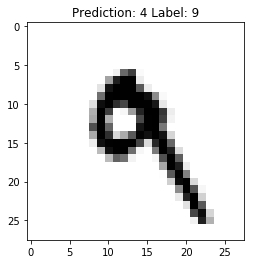

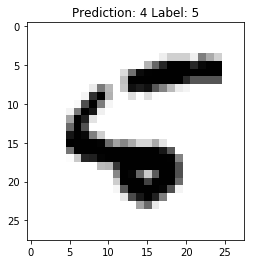

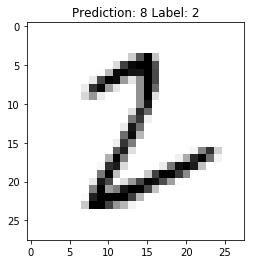

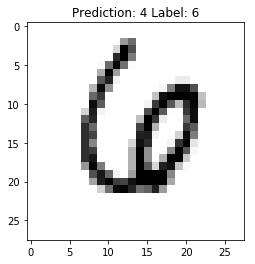

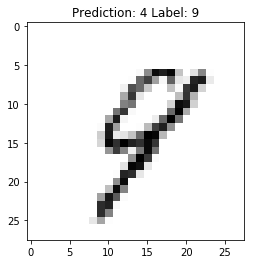

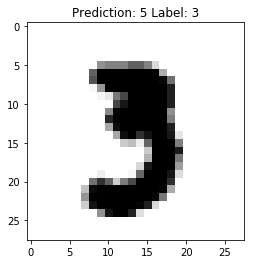

In [15]:
for x in range(100):
    # Load a single test image and its label
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    # Convert the one-hot label to an integer
    label = y_train.argmax()
    # Get the classification from our neural network's digit_weights final layer, and convert it to an integer
    prediction = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    # If the prediction does not match the correct label, display it
    if (prediction != label) :
        plt.title('Prediction: %d Label: %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()